In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Linear Regression implemented from scratch

In [2]:


class MyLinearRegression:
    def __init__(self, lr =0.05, num_iters = 1000):
        self.lr =lr
        self.num_iters = num_iters
        self.bias = None
        self.weights = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        

        for i in range(self.num_iters):

            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/num_samples) * np.dot(X.T, (y_pred-y)) * 2
            db = (1/num_samples) * np.sum(y_pred-y) * 2

            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            # if i % 100 == 0:
            #     loss = np.mean((y - y_pred) ** 2)
            #     print(f"Iteration {i}, Loss (MSE): {loss}")

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    

    def mse(self, y_test, y_pred):
        return np.mean((y_test - y_pred)**2)






['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


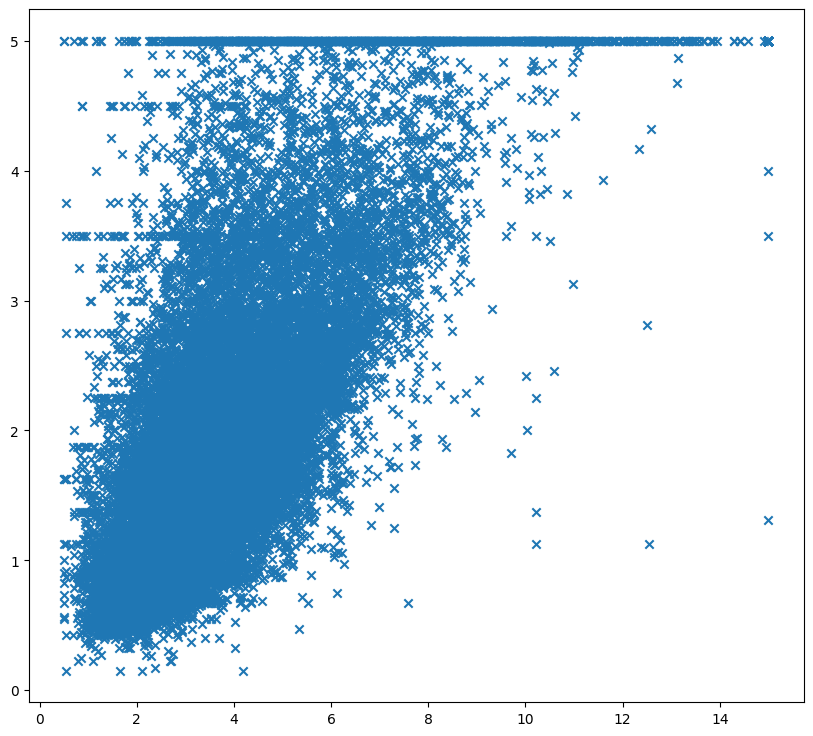

In [3]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

# df.head()

plot_x = df['MedInc']
plot_y = df['target']

plt.figure(figsize=(10,9))
plt.scatter(plot_x,plot_y, marker='x')

print(data.feature_names)

In [4]:


X = df.drop('target', axis='columns')
y = df['target']


scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [5]:
model = MyLinearRegression()

model.fit(X_train,y_train)

preds = model.predict(X_test)

print(f"MSE: {model.mse(y_test, preds)}")


# I experimented with multiple learning rate and it should be noted that the mse kept decreasing with decrease in learning rate and increase in number of iterations.

# faced an error for nan value as data was not scaled so weights were exploding resulting in inf loss. Scaling the features solved the problem.

MSE: 0.5388996471617725


Linear Regression Implemented using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

new_model = LinearRegression()
new_model.fit(X_train,y_train)

preds = new_model.predict(X_test)


mse = mean_squared_error(y_test, preds)
print(f"MSE: {mse}")


##end

MSE: 0.5388649914036732
